In [3]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

In [5]:
ex=sl.ExpSys(v0H=400,Nucs=['13C'],vr=10000,pwdavg=sl.PowderAvg()[0])
ex.set_inter('CSA',i=0,delta=0)
L=ex.Liouvillian()
L.add_relax('T1',i=0,T1=1)
L.add_relax('T2',i=0,T2=.5)
L.add_relax('recovery')

seq=L.Sequence()

rho=sl.Rho('zero','13Cz')

rho.DetProp(seq,n=50000)

State-space reduction: 4->2


Density Matrix/Detection Operator
rho0: zero
detect[0]: 13Cz
Current time is 5000000.000 microseconds
50000 time points have been recorded


<IPython.core.display.Javascript object>


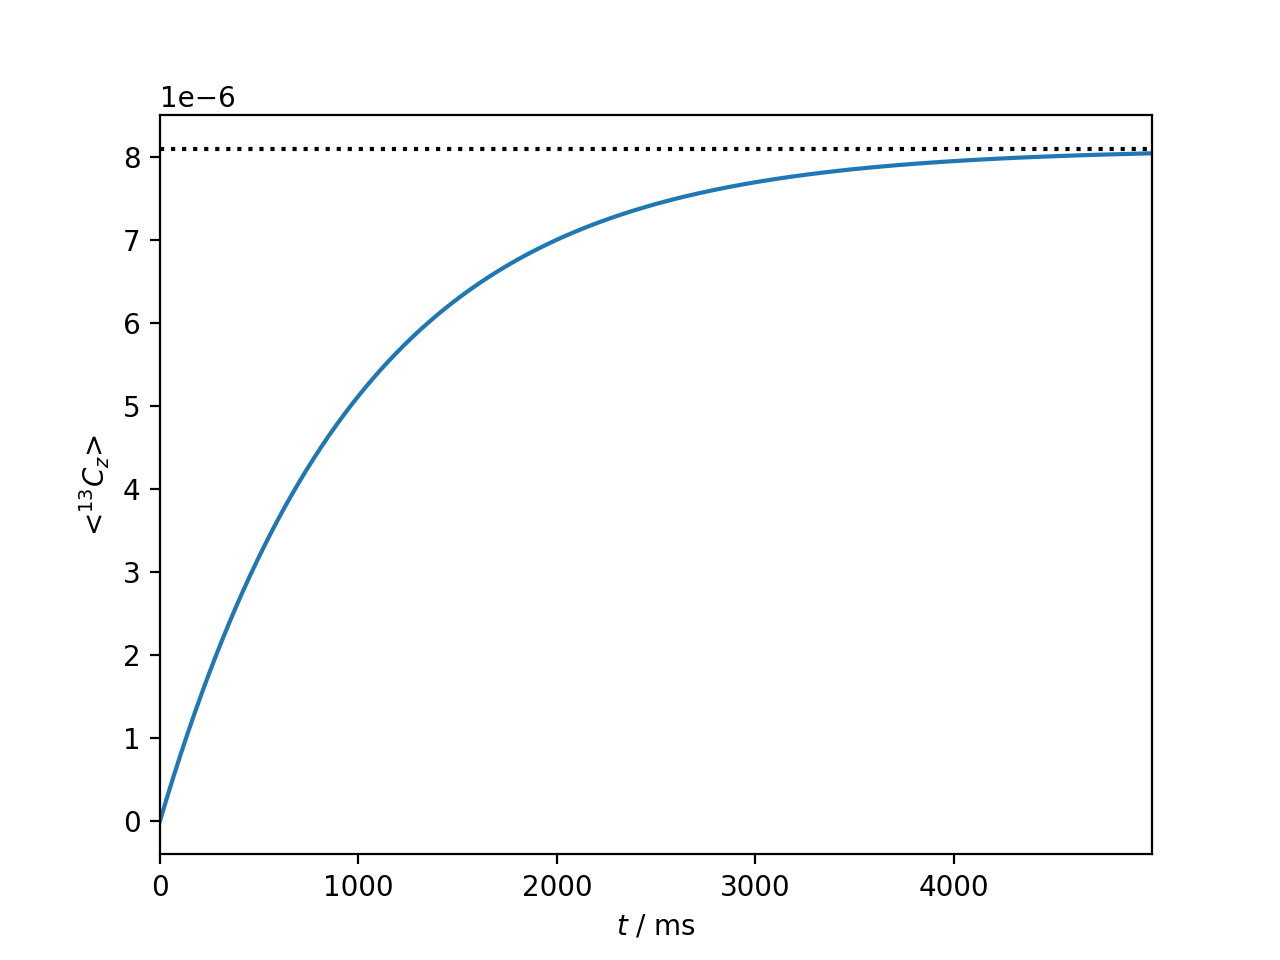

In [6]:
ax=rho.plot()
ax.set_xlim([0,rho.t_axis[-1]*1e3])
ax.plot(ax.get_xlim(),ex.Peq[0]*np.ones(2),color='black',linestyle=':')

State-space reduction: 16->4


<IPython.core.display.Javascript object>


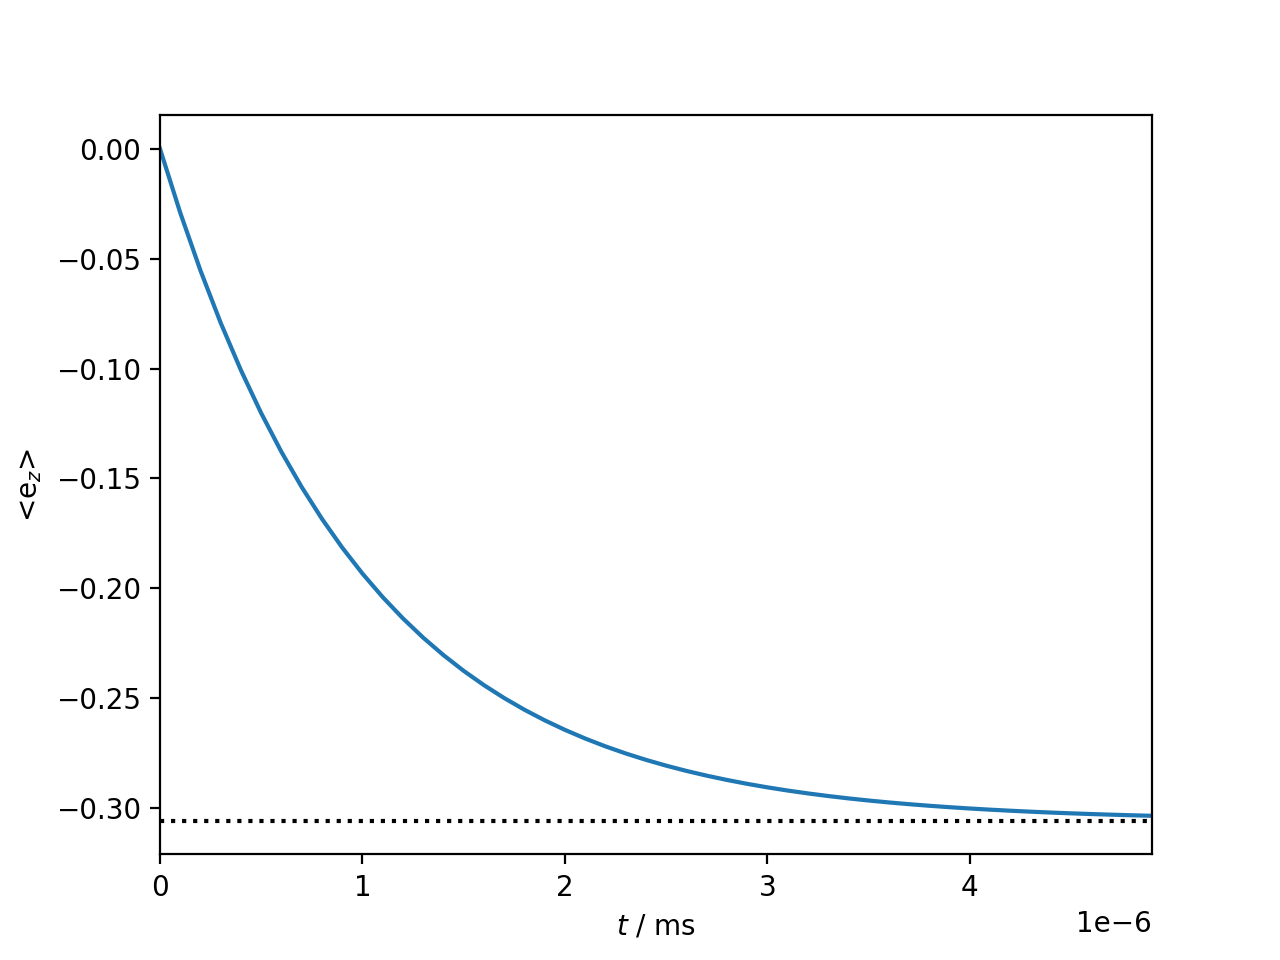

In [7]:
ex=sl.ExpSys(v0H=400,Nucs=['13C','e-'],vr=10000,pwdavg=sl.PowderAvg()[0],T_K=20)
ex.set_inter('hyperfine',i0=0,i1=1,Axx=10000,Ayy=10000,Azz=10000)
L=ex.Liouvillian()
L.add_relax('T1',i=1,T1=1e-9)
L.add_relax('T2',i=1,T2=1e-10)

L.add_relax('T1',i=0,T1=1)
L.add_relax('T2',i=0,T2=.5)
L.add_relax('recovery')

seq=L.Sequence(Dt=1e-10)

rho=sl.Rho('Zero','ez')

rho.DetProp(seq,n=50)
ax=rho.plot()
ax.set_xlim([0,rho.t_axis[-1]*1e3])
ax.plot(ax.get_xlim(),ex.Peq[1]*np.ones(2),color='black',linestyle=':')

<IPython.core.display.Javascript object>


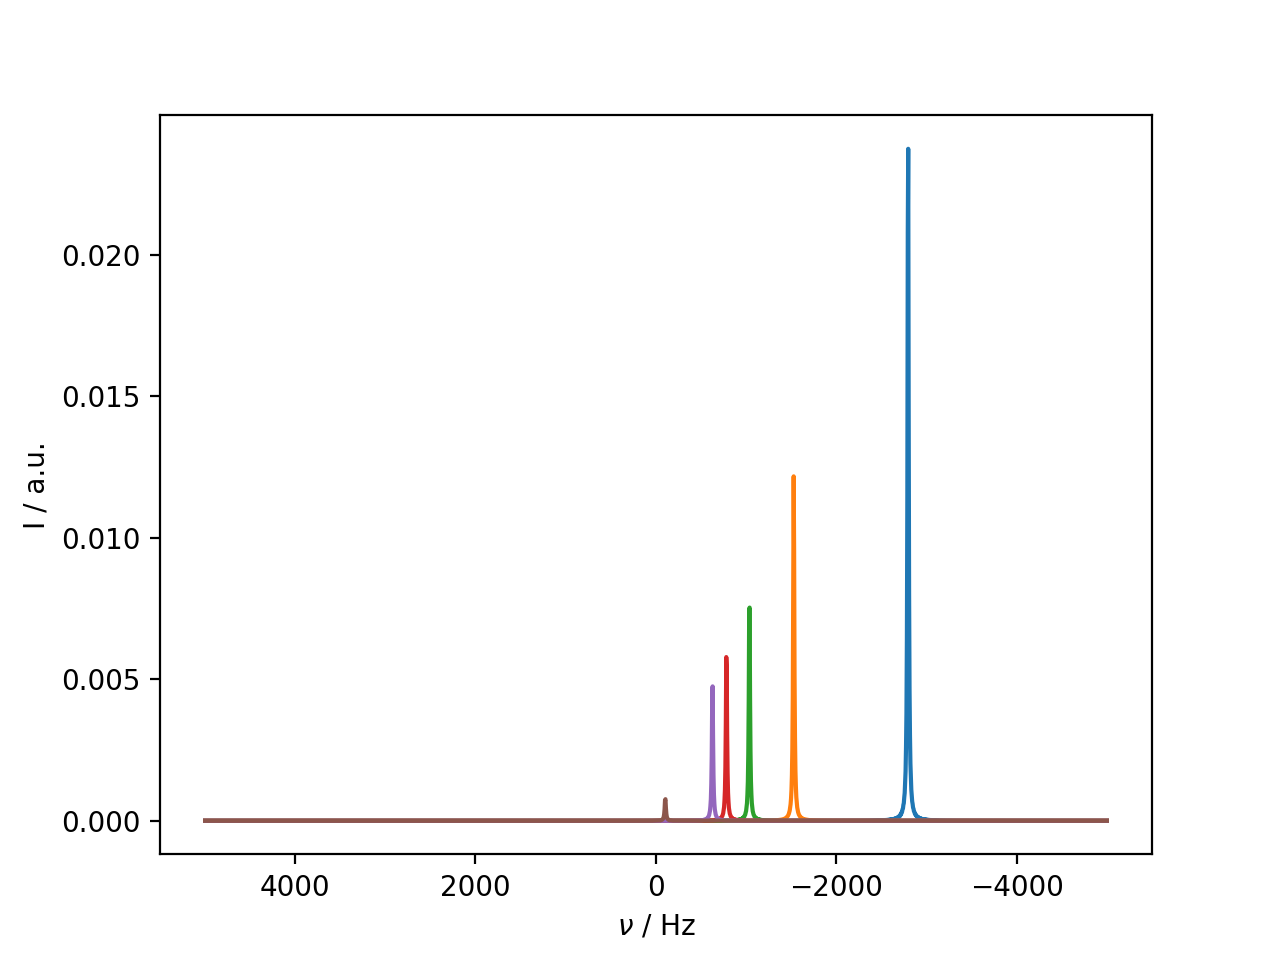

State-space reduction: 16->2
State-space reduction: 16->2
State-space reduction: 16->2
State-space reduction: 16->2
State-space reduction: 16->2
State-space reduction: 16->2


In [8]:
ax=plt.subplots()[1]
for T in [10,20,30,40,50,300]:
    ex=sl.ExpSys(v0H=400,Nucs=['13C','e-'],pwdavg=sl.PowderAvg()[0],T_K=T)
    ex.set_inter('hyperfine',i0=0,i1=1,Axx=10000,Ayy=10000,Azz=10000)
    L=ex.Liouvillian()
    L.add_relax('T1',i=1,T1=1e-10)
    L.add_relax('T2',i=1,T2=1e-12)

    L.add_relax('recovery')

    seq=L.Sequence(Dt=1e-4)

    rho=sl.Rho('13Cx','13Cp')

    rho.DetProp(seq,n=1024)
    rho.plot(FT=True,apodize=True,ax=ax)

State-space reduction: 16->4


<IPython.core.display.Javascript object>


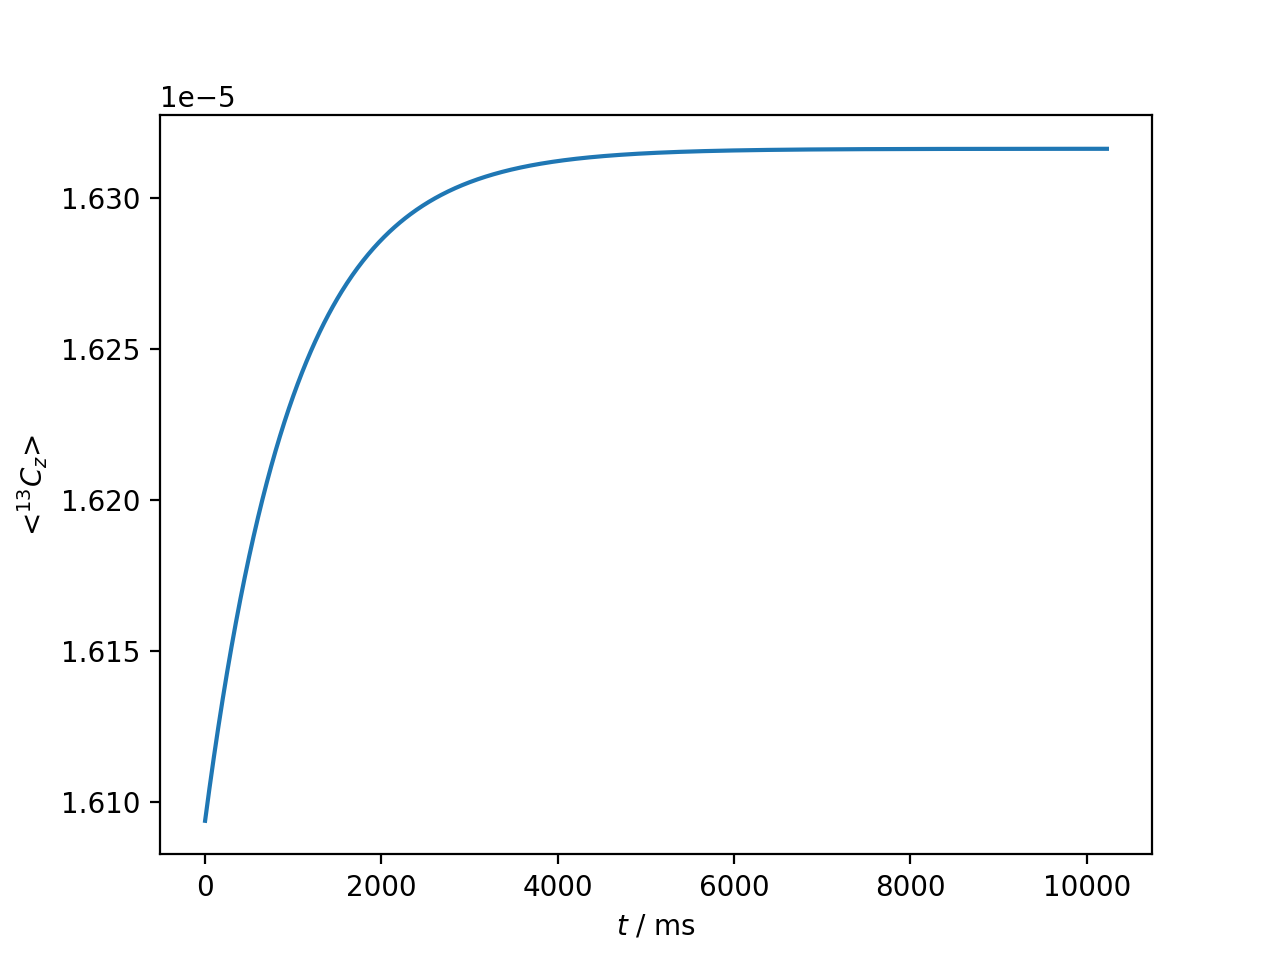

<AxesSubplot:xlabel='$t$ / ms', ylabel='<$^{13}C_z$>'>

In [12]:
ex=sl.ExpSys(v0H=400,Nucs=['13C','e-'],vr=0,pwdavg=sl.PowderAvg()[0],T_K=150)
ex.set_inter('hyperfine',i0=0,i1=1,Axx=-10000,Ayy=-10000,Azz=20000)
L=ex.Liouvillian()
L.add_relax('T1',i=1,T1=1e-10)
L.add_relax('T2',i=1,T2=1e-12)
L.add_relax('T1',i=0,T1=1)
L.add_relax('T2',i=0,T2=5e-3)

L.add_relax('recovery')

seq=L.Sequence(Dt=1e-2)

rho=sl.Rho('Thermal','13Cz')

rho.DetProp(seq,n=1024)
rho.plot()

In [24]:
ex=sl.ExpSys(v0H=600,Nucs=['e-','1H'],LF=[False,True],vr=5000,T_K=1,pwdavg=sl.PowderAvg(q=2))
ex.set_inter('hyperfine',i0=0,i1=1,Axx=-1000000,Ayy=-1000000,Azz=2000000)
ex.set_inter('g',i=0,gxx=2.0023,gyy=2.0023,gzz=2.0023,euler=[0,np.pi/4,0])

L=ex.Liouvillian()
L.add_relax(Type='T2',i=0,T2=.890e-6)
L.add_relax(Type='T2',i=1,T2=5e-3)
L.add_relax(Type='T1',i=0,T1=1.4e-3)
L.add_relax(Type='T1',i=1,T1=20)
_=L.add_relax(Type='recovery')

seq=L.Sequence()
seq.add_channel(channel='e-',v1=3e6,voff=600e6)

rho=sl.Rho(rho0='Thermal',detect=['ez','1Hz'])
rho.DetProp(seq,n=500)

State-space reduction: 16->16


Density Matrix/Detection Operator
rho0: Thermal
detect[0]: ez
detect[1]: 1Hz
Current time is 100000.000 microseconds
500 time points have been recorded


<IPython.core.display.Javascript object>


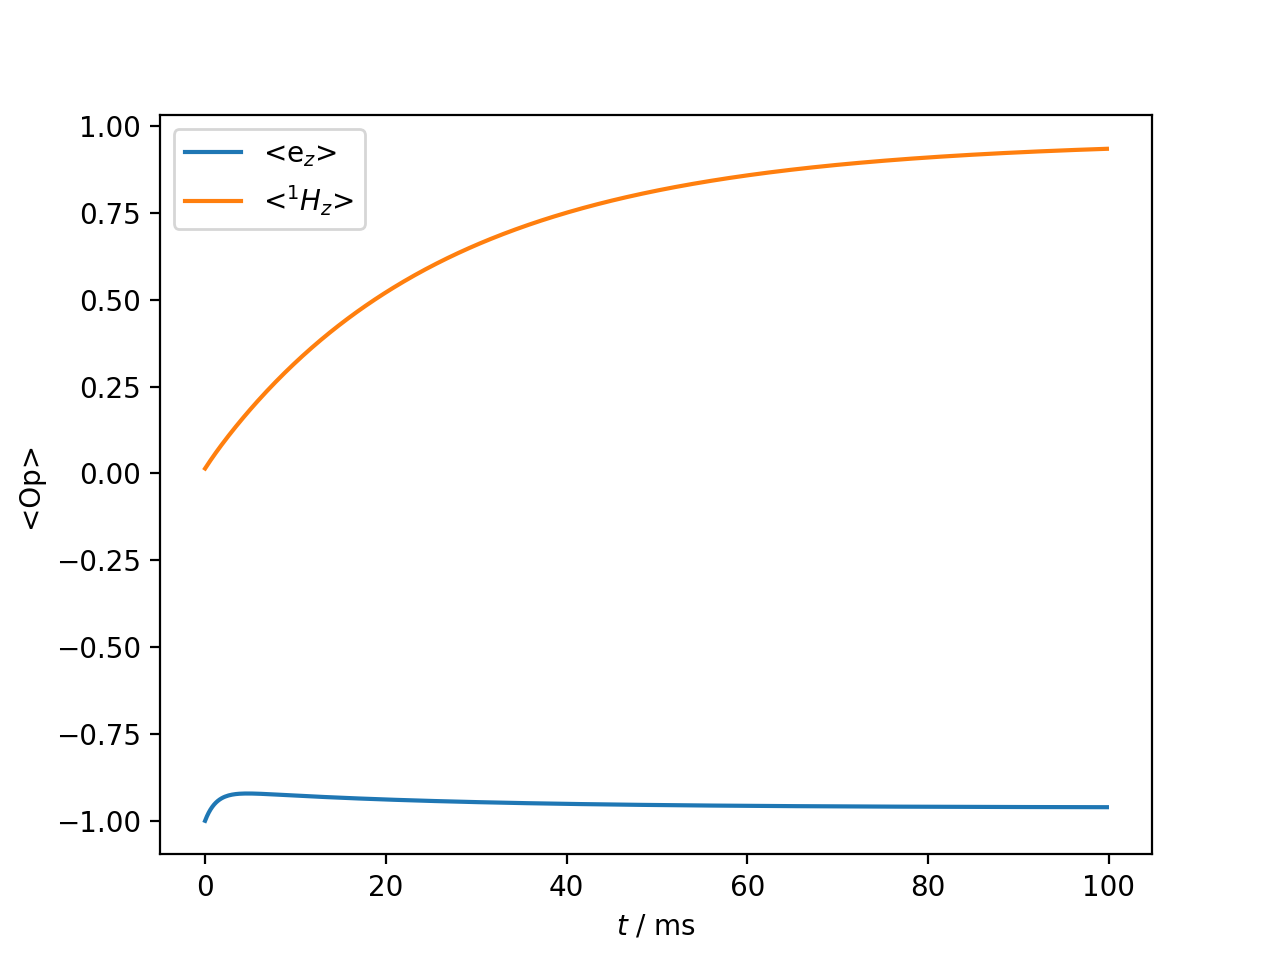

<AxesSubplot:xlabel='$t$ / ms', ylabel='<Op>'>

In [25]:
rho.plot()